# Housing prices prediction

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


%matplotlib inline

In [4]:
df = pd.read_csv("data/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

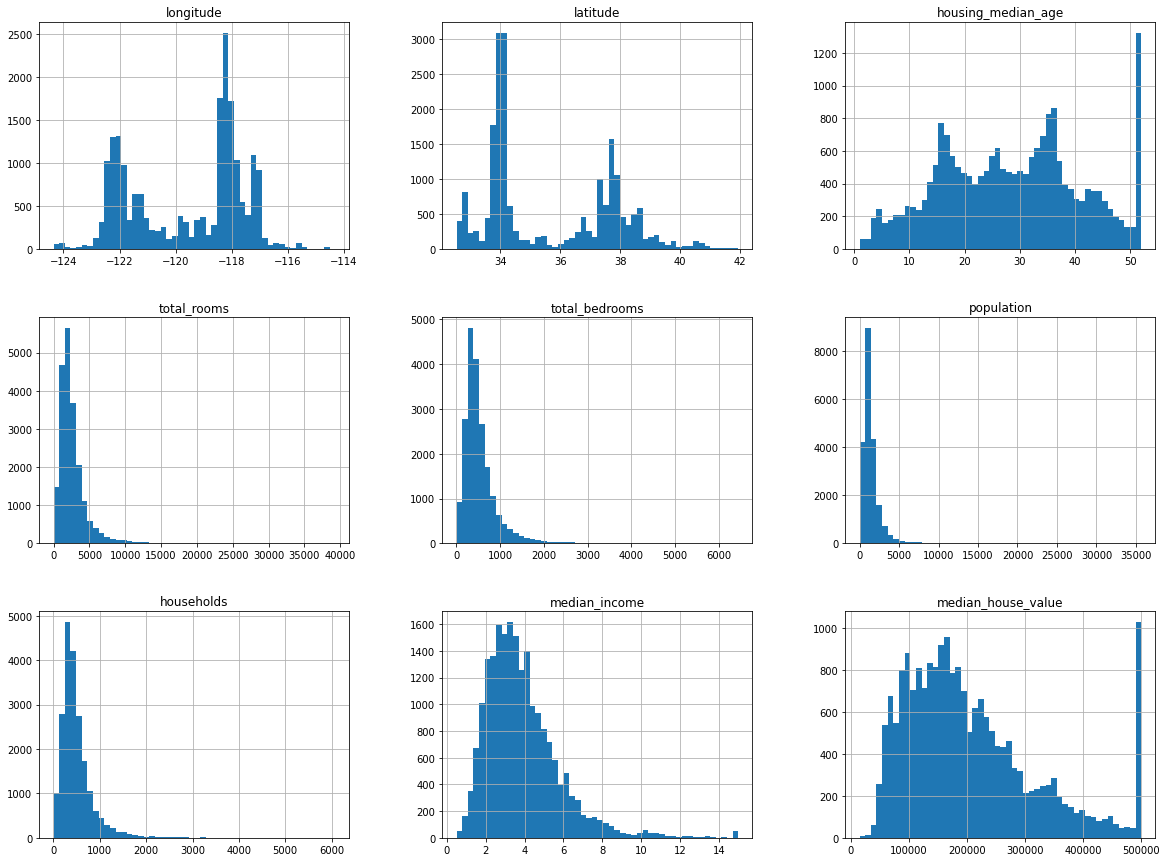

In [12]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [14]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 102)

Income category atrribute based on median income

In [67]:
df["income_cat"] = np.ceil(df["median_income"] / 1.5)
df["income_cat"].where(df["income_cat"] < 5, 5.0, inplace = True)

df["income_cat"].value_counts() / len(df)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

In [68]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 102)
for train_id, test_id in split.split(df, df["income_cat"]):
    strat_train_set = df.iloc[train_id]
    strat_test_set = df.iloc[test_id]

In [69]:
for _ in (strat_train_set, strat_test_set):
    _.drop(["income_cat"], axis = 1, inplace = True)

/home/barni13/Desktop/Projects/Machine-Learning/ml_env/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [70]:
df_train = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

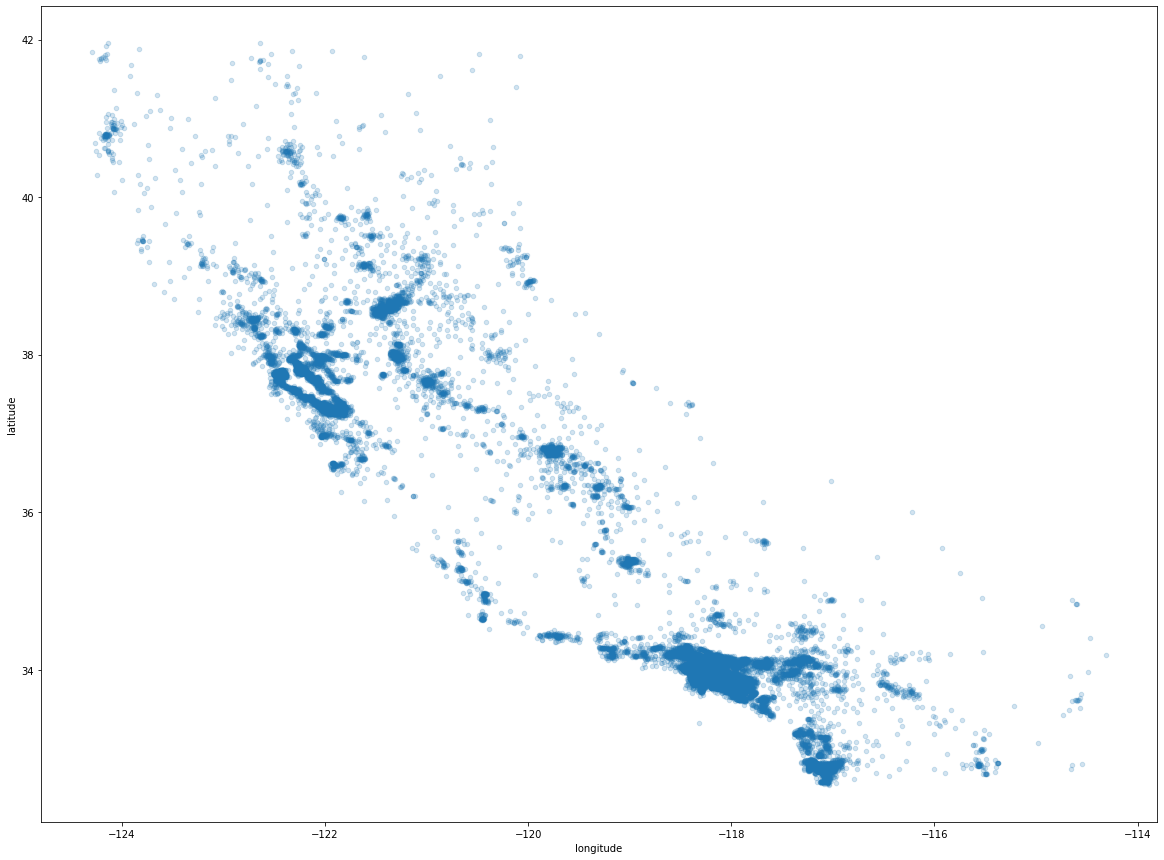

In [71]:
df_train.plot(kind = "scatter", x = "longitude", y = "latitude", figsize = (20, 15), alpha = 0.2)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

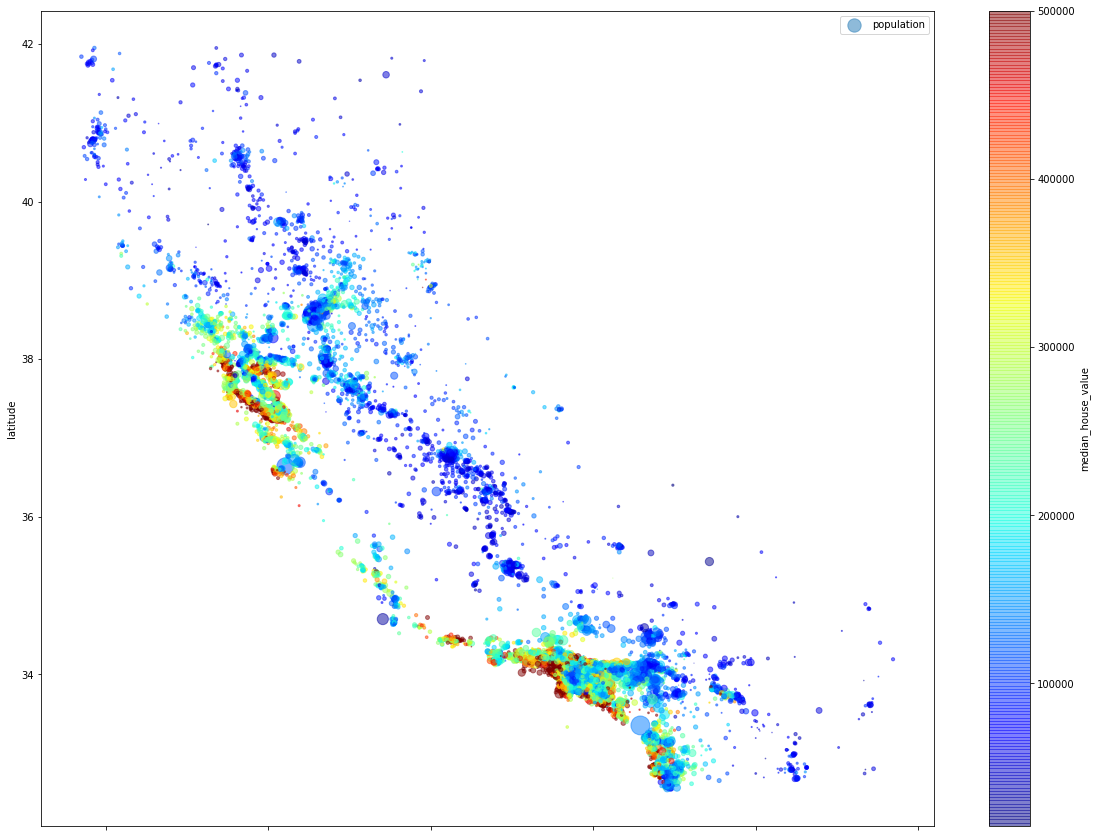

In [72]:
df_train.plot(kind = "scatter", x = "longitude", y = "latitude", figsize = (20, 15), alpha = 0.5,
               s = df_train["population"] / 100, label = "population", c = "median_house_value",
               cmap = plt.get_cmap("jet"))

In [73]:
corr_matrix = df_train.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.689955
total_rooms           0.135597
housing_median_age    0.109856
households            0.066271
total_bedrooms        0.049850
population           -0.024259
longitude            -0.044108
latitude             -0.144922
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

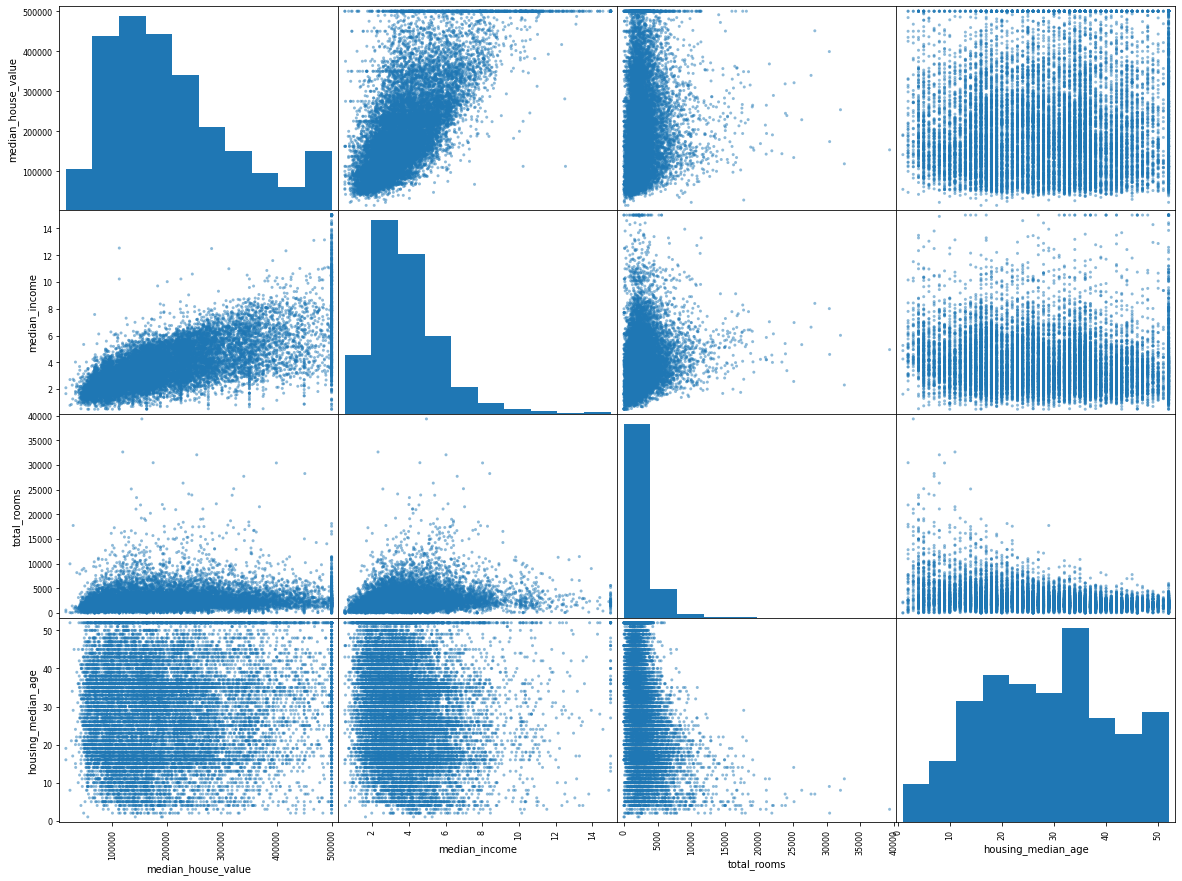

In [75]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income",
              "total_rooms", "housing_median_age"]
scatter_matrix(df_train[attributes], figsize = (20, 15))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

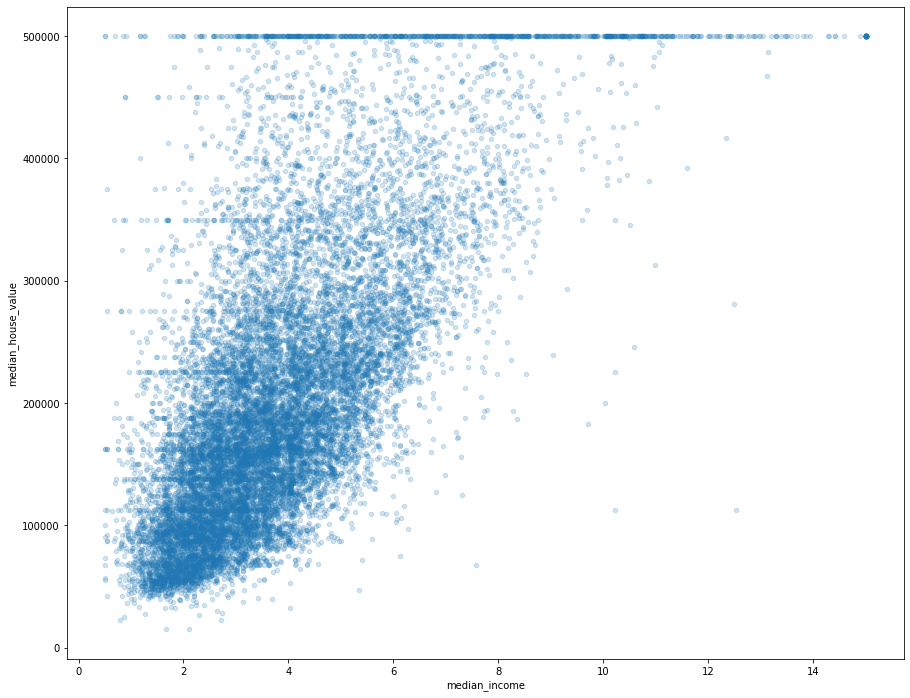

In [80]:
df_train.plot(x = "median_income", y = "median_house_value", kind = "scatter", alpha = 0.2, figsize = (15, 12))

In [81]:
df_train["rooms_per_household"] = df_train["total_rooms"] / df_train["households"]
df_train["bedrroms_per_room"] = df_train["total_bedrooms"] / df_train["total_rooms"]
df_train["population_per_household"] = df_train["population"] / df_train["households"]
df_train["long/lat"] = df_train["longitude"] / df_train["latitude"]

In [82]:
corr_matrix = df_train.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.689955
rooms_per_household         0.165752
total_rooms                 0.135597
housing_median_age          0.109856
households                  0.066271
total_bedrooms              0.049850
population                 -0.024259
longitude                  -0.044108
latitude                   -0.144922
population_per_household   -0.159194
long/lat                   -0.203410
bedrroms_per_room          -0.256855
Name: median_house_value, dtype: float64

In [83]:
df = strat_train_set.drop("median_house_value", axis = 1)
df_labels = strat_train_set["median_house_value"].copy()

In [87]:
from sklearn.impute import SimpleImputer

In [88]:
imputer = SimpleImputer(strategy = "median")

In [90]:
df_num = df.drop("ocean_proximity", axis = 1)

imputer.fit(df_num)
imputer.statistics_

array([-118.5   ,   34.26  ,   29.    , 2134.    ,  436.    , 1165.    ,
        410.5   ,    3.5388])

In [91]:
imputed = imputer.transform(df_num)

df_tr = pd.DataFrame(imputed, columns = df_num.columns)

In [92]:
from sklearn.preprocessing import OneHotEncoder

In [110]:
df_cat = df_train["ocean_proximity"]

encoder = OneHotEncoder()
df_cat_1hot = encoder.fit_transform(np.array(df_cat).reshape(-1, 1))
df_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [109]:
encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [111]:
df_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [113]:
from sklearn.preprocessing import LabelBinarizer

In [114]:
encoder = LabelBinarizer()
df_cat_1hot = encoder.fit_transform(df_cat)
df_cat_1hot

array([[0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [115]:
from sklearn.base import BaseEstimator, TransformerMixin

In [125]:
long_ix, lat_ix, rooms_ix, bedrooms_ix, population_ix, household_ix = 0, 1, 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True, add_long_lat = False):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        self.add_long_lat = add_long_lat
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        lat_log = X[:, long_ix] / X[:, lat_ix]
        if self.add_bedrooms_per_room and self.add_long_lat:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room, lat_log]
        elif self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        elif self.add_long_lat:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         lat_log]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
    
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
df_extra_attr = attr_adder.transform(df_train.values)

In [138]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn_features.transformers import DataFrameSelector

In [158]:
num_attr = list(df_num)
cat_attr = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attr)),
    ('imputer', SimpleImputer(strategy = "median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

cat_piepline = Pipeline([
    ('selector', DataFrameSelector(cat_attr)),
    ('one_hot_encoder', OneHotEncoder(sparse=False))
])

full_pipeline = FeatureUnion(transformer_list = [
    ('num_piepline', num_pipeline),
    ('cat_piepline', cat_piepline)
])

In [159]:
df_prepared = full_pipeline.fit_transform(df_train)
df_prepared

array([[ 0.91849111, -0.73616378,  1.77094825, ...,  0.        ,
         0.        ,  0.        ],
       [-0.91569836,  1.37507125, -1.01096643, ...,  0.        ,
         0.        ,  0.        ],
       [-0.81102994,  1.42656479, -1.56734937, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.18982994,  0.80396111,  0.26076599, ...,  0.        ,
         0.        ,  0.        ],
       [-1.16490888,  0.84141095,  0.34024927, ...,  0.        ,
         0.        ,  0.        ],
       [-0.0833352 ,  0.51372481,  1.05559876, ...,  0.        ,
         0.        ,  0.        ]])

In [160]:
df_prepared.shape

(16512, 16)

# Select and Train Model 

In [161]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [162]:
lin_reg = LinearRegression()
lin_reg.fit(df_prepared, df_labels)

LinearRegression()

In [164]:
housing_predictions = lin_reg.predict(df_prepared)
lin_mse = mean_squared_error(df_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68140.5115330156

In [165]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(df_prepared, df_labels)

DecisionTreeRegressor()

In [166]:
housing_predictions = tree_reg.predict(df_prepared)
tree_mse = mean_squared_error(df_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0